In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS
from rekomenda.utils import load_data

In [15]:
train, test  = load_data(filepath='../ml-latest-small/ratings.csv', split_ratio=0.8)

In [16]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [17]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [18]:
train_als = BiasOnlyALS(lambda_reg=0.05)

In [19]:
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=10)

Iteration 1/10 - RMSE: 0.7986, NLL: 25790.9303
Iteration 2/10 - RMSE: 0.7815, NLL: 24722.5089
Iteration 3/10 - RMSE: 0.7801, NLL: 24641.7469
Iteration 4/10 - RMSE: 0.7800, NLL: 24633.7053
Iteration 5/10 - RMSE: 0.7799, NLL: 24632.6269
Iteration 6/10 - RMSE: 0.7799, NLL: 24632.3931
Iteration 7/10 - RMSE: 0.7799, NLL: 24632.2920
Iteration 8/10 - RMSE: 0.7799, NLL: 24632.2170
Iteration 9/10 - RMSE: 0.7799, NLL: 24632.1482
Iteration 10/10 - RMSE: 0.7799, NLL: 24632.0814


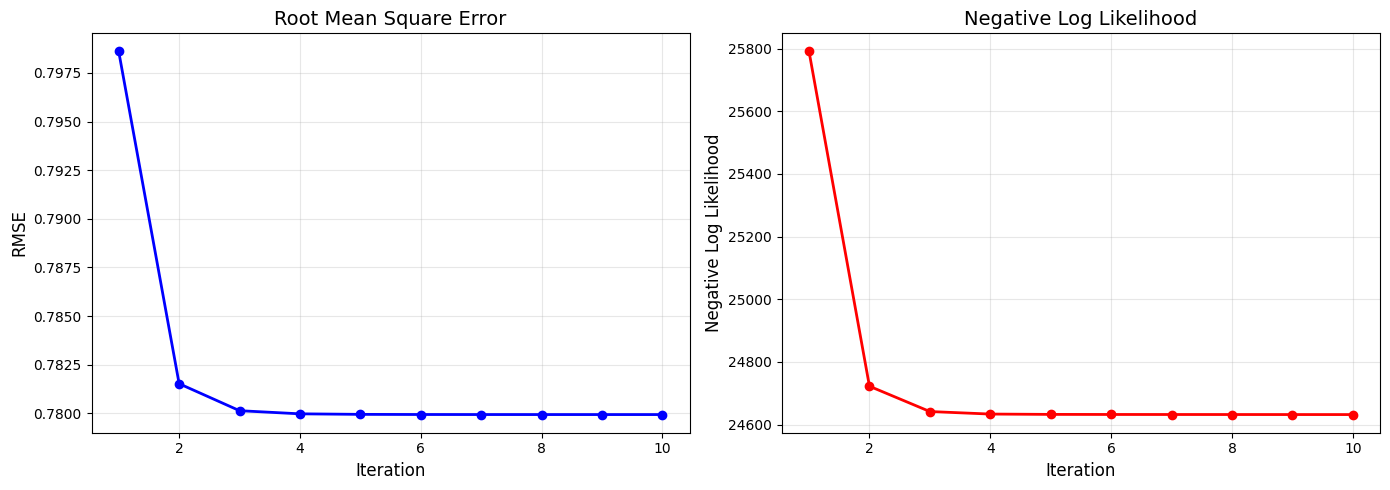

In [20]:
train_als.plot_metrics(output='pics/als-bias-only-train.pdf')

In [21]:
test_als = BiasOnlyALS(lambda_reg=0.05)

In [22]:
test_als.fit(csr_matrix=test_csr, csc_matrix=test_csc,n_iterations=10)

Iteration 1/10 - RMSE: 0.7195, NLL: 5346.3133
Iteration 2/10 - RMSE: 0.6988, NLL: 5055.9022
Iteration 3/10 - RMSE: 0.6958, NLL: 5018.6418
Iteration 4/10 - RMSE: 0.6953, NLL: 5012.2102
Iteration 5/10 - RMSE: 0.6951, NLL: 5010.8831
Iteration 6/10 - RMSE: 0.6951, NLL: 5010.5349
Iteration 7/10 - RMSE: 0.6950, NLL: 5010.3975
Iteration 8/10 - RMSE: 0.6950, NLL: 5010.3119
Iteration 9/10 - RMSE: 0.6950, NLL: 5010.2414
Iteration 10/10 - RMSE: 0.6950, NLL: 5010.1766


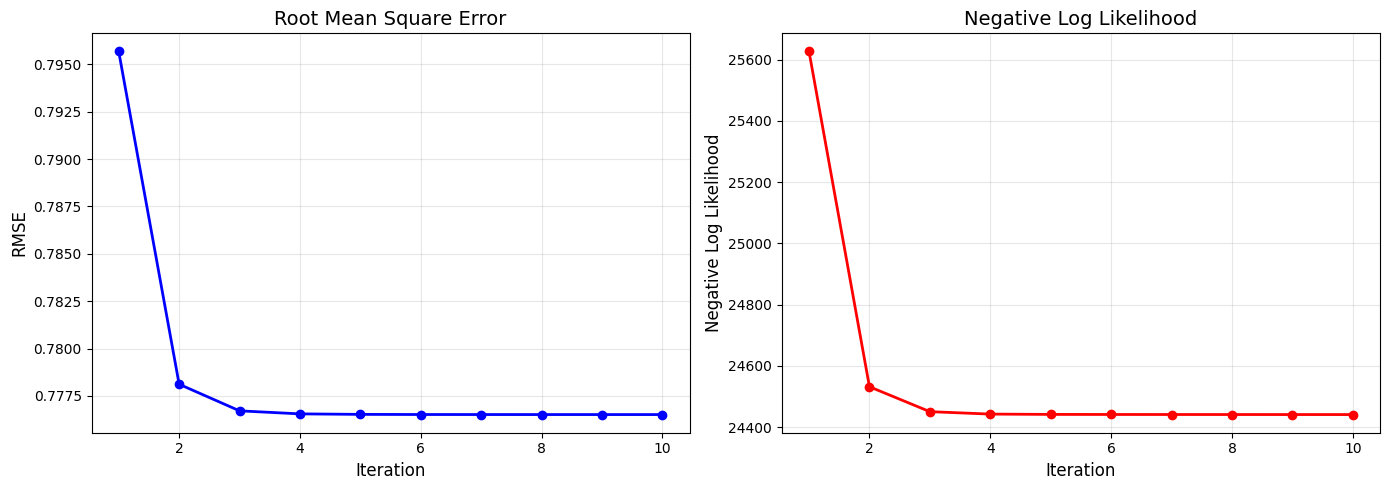

In [14]:
test_als.plot_metrics(output='pics/als-bias-only-test.pdf')